<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Multi_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [26]:
!pip install scikeras

#Git

In [27]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

fatal: destination path 'Advance-Statistical-Learnin--Semester-3' already exists and is not an empty directory.


#Data Reading

In [28]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [29]:
display(df.columns)

Index(['Patient_ID', 'Visit_ID', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG', 'Therapy',
       'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb', 'MRC_Bulbar',
       'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

#Tree-based Preprocessing

In [30]:
"""
Ordinal Data:
FVC


Nominal Data:
Tracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry




"""

'\nOrdinal Data:\nFVC\n\n\nNominal Data:\nTracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry\n\n\n\n\n'

##Tree-based preprocessing

### Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

# Select the nominal columns for encoding
nominal_cols = ['Tracheostomy', 'Therapy', 'Ventilation', 'PEG', 'Clinical_onset_type','Spirometry','FVC']

# Create a copy of the DataFrame to avoid modifying the original
df_tree_encoded = df.copy()

# Apply Label Encoding to each nominal column
for col in nominal_cols:
    le = LabelEncoder()
    df_tree_encoded[col] = le.fit_transform(df_tree_encoded[col])

# Display the first few rows of the new DataFrame to verify
display(df_tree_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [32]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_tree_encoded = df_tree_encoded.drop('Patient_ID', axis=1)
df_tree_encoded = df_tree_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_tree_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,3,1,3,0,0,0,1,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,3,1,0,0,0,0,3,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,0,1,3,0,0,0,3,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


###Preprocessing

In [33]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_tree_encoded.drop('KINGS_Total', axis=1)
y = df_tree_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train_tree.shape)
print("Testing set shape:", X_test_tree.shape)

Training set shape: (1129, 21)
Testing set shape: (283, 21)


In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features
X_train_numerical = X_train_tree[numerical_features]
X_test_numerical = X_test_tree[numerical_features]

# Select the categorical features (all columns not in numerical_features)
categorical_features = X_train_tree.columns.difference(numerical_features)
X_train_categorical = X_train_tree[categorical_features]
X_test_categorical = X_test_tree[categorical_features]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train_tree.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test_tree.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_scaled_tree = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)
X_test_scaled_tree = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_scaled_tree.shape)
print("Testing data shape after selective scaling:", X_test_scaled_tree.shape)

Training data shape after selective scaling: (1129, 21)
Testing data shape after selective scaling: (283, 21)


#Tree-based Modeling

##RF

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

# Initialize and train the RandomForestClassifier model with the specified parameters
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled_tree, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled_tree)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled_tree)
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy:.4f}\n")

# Note: This approach doesn't perform cross-validation and is just training
# and evaluating the model with the specified parameters on a single split.

Accuracy on training set: 1.0000
Accuracy on test set: 0.7915



##XGBoost

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Adjust the target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_test_indexed = y_test - 1


# Train the model using the scaled data
model_xgb.fit(X_train_scaled_tree, y_train_indexed)

# Make predictions on the scaled test set
y_pred_xgb = model_xgb.predict(X_test_scaled_tree)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_indexed, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print classification report for more detailed evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test_indexed, y_pred_xgb))

XGBoost Accuracy: 0.7986

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.61      0.68      0.64        53
           2       0.78      0.73      0.76        83
           3       0.91      0.91      0.91        99

    accuracy                           0.80       283
   macro avg       0.78      0.78      0.78       283
weighted avg       0.80      0.80      0.80       283



#Linear Preprocessing

###Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_linear_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_linear_encoded[col] = le.fit_transform(df_linear_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_linear_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [40]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_linear_encoded = df_linear_encoded.drop('Patient_ID', axis=1)
df_linear_encoded = df_linear_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_linear_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [41]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_linear_encoded
df_linear_encoded = pd.get_dummies(df_linear_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_linear_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###Preprocessing

In [42]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_linear_encoded
X_linear = df_linear_encoded.drop('KINGS_Total', axis=1)
y_linear = df_linear_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("Training set shape:", X_train_linear.shape)
print("Testing set shape:", X_test_linear.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


In [43]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features_linear = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features for linear models
X_train_linear_numerical = X_train_linear[numerical_features_linear]
X_test_linear_numerical = X_test_linear[numerical_features_linear]

# Select the categorical features for linear models (all columns not in numerical_features_linear)
categorical_features_linear = X_train_linear.columns.difference(numerical_features_linear)
X_train_linear_categorical = X_train_linear[categorical_features_linear]
X_test_linear_categorical = X_test_linear[categorical_features_linear]


# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_linear_scaled_numerical = scaler_linear.fit_transform(X_train_linear_numerical)
X_test_linear_scaled_numerical = scaler_linear.transform(X_test_linear_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_linear_scaled_numerical_df = pd.DataFrame(X_train_linear_scaled_numerical, columns=numerical_features_linear, index=X_train_linear.index)
X_test_linear_scaled_numerical_df = pd.DataFrame(X_test_linear_scaled_numerical, columns=numerical_features_linear, index=X_test_linear.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_linear_scaled = pd.concat([X_train_linear_scaled_numerical_df, X_train_linear_categorical], axis=1)
X_test_linear_scaled = pd.concat([X_test_linear_scaled_numerical_df, X_test_linear_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_linear_scaled.shape)
print("Testing data shape after selective scaling:", X_test_linear_scaled.shape)

Training data shape after selective scaling: (1129, 27)
Testing data shape after selective scaling: (283, 27)


#Linear Modeling

##SVM

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM Classifier model
# You can tune hyperparameters like C, kernel, gamma, etc.
# Set probability=True to enable predict_proba
model_svm = SVC(random_state=42, probability=True)

# Train the model using the scaled data
model_svm.fit(X_train_linear_scaled, y_train_linear)

# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_linear, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print classification report for more detailed evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test_linear, y_pred_svm))

SVM Accuracy: 0.7633

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.69      0.66        48
           2       0.53      0.64      0.58        53
           3       0.87      0.65      0.74        83
           4       0.90      0.96      0.93        99

    accuracy                           0.76       283
   macro avg       0.74      0.73      0.73       283
weighted avg       0.78      0.76      0.77       283



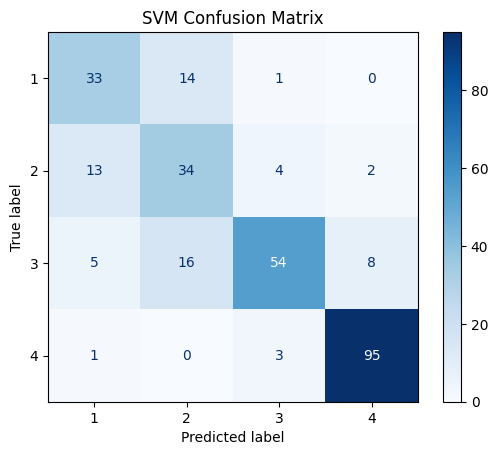

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the SVM model
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Generate the confusion matrix
cm_svm = confusion_matrix(y_test_linear, y_pred_svm)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

##ANN

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

# Adjust the target variable to be 0-indexed for ANN
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_ann.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

# Make predictions and print classification report
y_pred_ann = model_ann.predict(X_test_linear_scaled)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1)

print("\nANN Classification Report:")
# Use the original y_test_linear for the classification report labels for clarity
print(classification_report(y_test_linear_indexed, y_pred_ann_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.7774
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        48
           1       0.58      0.62      0.60        53
           2       0.80      0.72      0.76        83
           3       0.92      0.93      0.92        99

    accuracy                           0.78       283
   macro avg       0.75      0.75      0.75       283
weighted avg       0.78      0.78      0.78       283



##NN

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                 metrics=['accuracy'])

# Display the model summary
model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,492 (5.83 KB)

 Trainable params: 1,492 (5.83 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Adjust the target variable to be 0-indexed for training
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_nn.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy_nn = model_nn.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"\nNeural Network Accuracy: {accuracy_nn:.4f}")

# Make predictions and print classification report
y_pred_nn = model_nn.predict(X_test_linear_scaled)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test_linear_indexed, y_pred_nn_classes))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3034 - loss: 1.3530 - val_accuracy: 0.5487 - val_loss: 1.1265
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5054 - loss: 1.1404 - val_accuracy: 0.5708 - val_loss: 0.9979
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6234 - loss: 0.9948 - val_accuracy: 0.6062 - val_loss: 0.9066
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6374 - loss: 0.9205 - val_accuracy: 0.6327 - val_loss: 0.8374
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6974 - loss: 0.8355 - val_accuracy: 0.6460 - val_loss: 0.7872
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7089 - loss: 0.7848 - val_accuracy: 0.6416 - val_loss: 0.7461
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7080 - loss: 0.7239 - val_accuracy: 0.6549 - val_loss: 0.7138
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7259 - loss: 0.6999 - val_accuracy: 0.6593 - val_loss

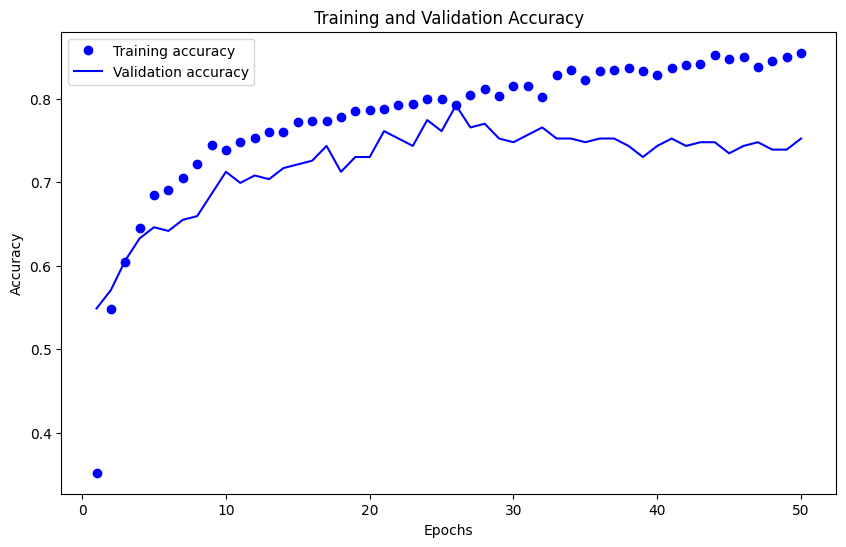

In [50]:
import matplotlib.pyplot as plt

# Get the accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

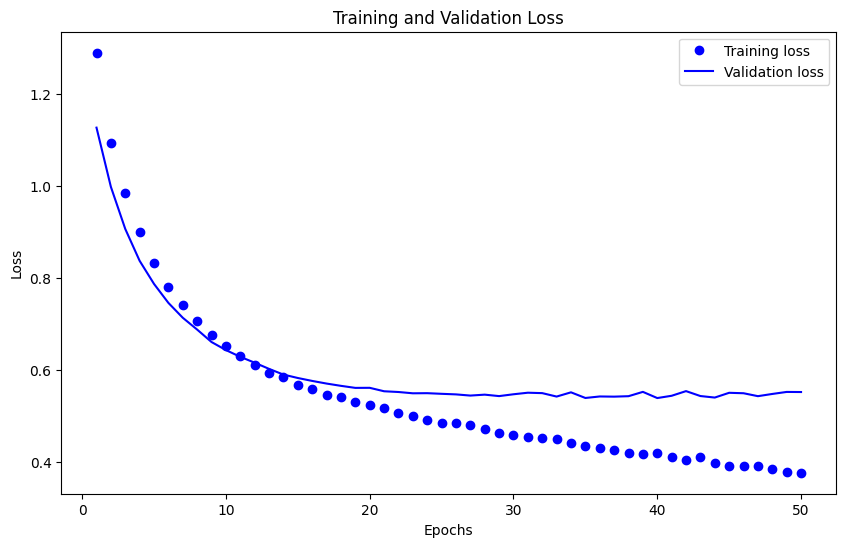

In [51]:
import matplotlib.pyplot as plt

# Get the loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Multi Modeling

In [24]:
# === MULTI-MODEL ENSEMBLE (RF + XGB + SVM + ANN [+ Keras NN optional]) ===
# Expects these to exist in your workspace:
#   X_train_scaled_tree, X_test_scaled_tree
#   X_train_linear_scaled, X_test_linear_scaled
#   y_train, y_test
# -------------------------------------------------------------------------

import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# 0) Labels to 0..K-1
y_train_idx = y_train - 1
y_test_idx  = y_test  - 1
n_classes   = len(np.unique(y_train_idx))

# 1) Your tuned Random Forest (TREE features)
rf = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced_subsample',
    criterion='entropy',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# 2) Other base models
#    XGBoost (TREE features)
xgb = XGBClassifier(
    n_estimators=400, max_depth=5, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8,
    eval_metric="mlogloss", random_state=42, n_jobs=-1
)

#    SVM (LINEAR features)
svm = SVC(kernel="rbf", C=2.0, probability=True,
          class_weight="balanced", random_state=42)

#    ANN (sklearn MLP, acts as a shallow neural net; LINEAR features)
ann = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    alpha=1e-4,
    early_stopping=True, n_iter_no_change=20,
    max_iter=3000,
    random_state=42
)

# (Optional) Keras NN — set to True if you want to include it
use_keras_nn = False
if use_keras_nn:
    import tensorflow as tf
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping

    def build_keras_nn(input_dim, n_classes):
        m = Sequential([
            Dense(16, activation='relu', input_shape=(input_dim,)),
            Dropout(0.2),
            Dense(8, activation='relu'),
            Dense(8, activation='relu'),
            Dense(n_classes, activation='softmax')
        ])
        m.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        return m

    keras_nn = build_keras_nn(X_train_linear_scaled.shape[1], n_classes)
    es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# 3) Fit each model on its OWN feature matrix
rf.fit (X_train_scaled_tree,   y_train_idx)
xgb.fit(X_train_scaled_tree,   y_train_idx)
svm.fit(X_train_linear_scaled, y_train_idx)
ann.fit(X_train_linear_scaled, y_train_idx)

if use_keras_nn:
    keras_nn.fit(
        X_train_linear_scaled, y_train_idx,
        validation_split=0.15, epochs=200, batch_size=32, verbose=0,
        callbacks=[es]
    )

# 4) Predict probabilities on matching test sets
p_rf  = rf.predict_proba (X_test_scaled_tree)            # (n, C)
p_xgb = xgb.predict_proba(X_test_scaled_tree)
p_svm = svm.predict_proba(X_test_linear_scaled)
p_ann = ann.predict_proba(X_test_linear_scaled)

probs_list = [p_rf, p_xgb, p_svm, p_ann]
weights    = np.array([1.0, 1.0, 0.9, 0.9], dtype=float)  # rf, xgb, svm, ann

if use_keras_nn:
    p_nn = keras_nn.predict(X_test_linear_scaled, verbose=0)
    probs_list.append(p_nn)
    weights = np.append(weights, 0.9)  # add weight for Keras NN

# 5) Weighted soft voting
P = sum(w * p for w, p in zip(weights, probs_list)) / weights.sum()
y_pred_ens = P.argmax(axis=1)

# 6) Evaluate ensemble and each single model
print("=== ENSEMBLE ===")
print("Accuracy:", accuracy_score(y_test_idx, y_pred_ens))
print("Macro-F1:", f1_score(y_test_idx, y_pred_ens, average="macro"))
print(classification_report(y_test_idx, y_pred_ens, digits=3))

def report_single(name, probs):
    yhat = probs.argmax(axis=1)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test_idx, yhat))
    print("Macro-F1:", f1_score(y_test_idx, yhat, average="macro"))

report_single("RF",  p_rf)
report_single("XGB", p_xgb)
report_single("SVM", p_svm)
report_single("ANN", p_ann)
if use_keras_nn:
    report_single("KerasNN", p_nn)

# (Optional) Keep probabilities for later use in other blends
# p_stack = np.hstack(probs_list)  # meta-features for stacking if you want later


=== ENSEMBLE ===
Accuracy: 0.8091872791519434
Macro-F1: 0.7857209140574823
              precision    recall  f1-score   support

           0      0.727     0.833     0.777        48
           1      0.632     0.679     0.655        53
           2      0.855     0.711     0.776        83
           3      0.922     0.949     0.935        99

    accuracy                          0.809       283
   macro avg      0.784     0.793     0.786       283
weighted avg      0.815     0.809     0.809       283


--- RF ---
Accuracy: 0.8021201413427562
Macro-F1: 0.7742938660951953

--- XGB ---
Accuracy: 0.7985865724381626
Macro-F1: 0.7766781490866856

--- SVM ---
Accuracy: 0.7597173144876325
Macro-F1: 0.7286756268210919

--- ANN ---
Accuracy: 0.7491166077738516
Macro-F1: 0.7128308303519428


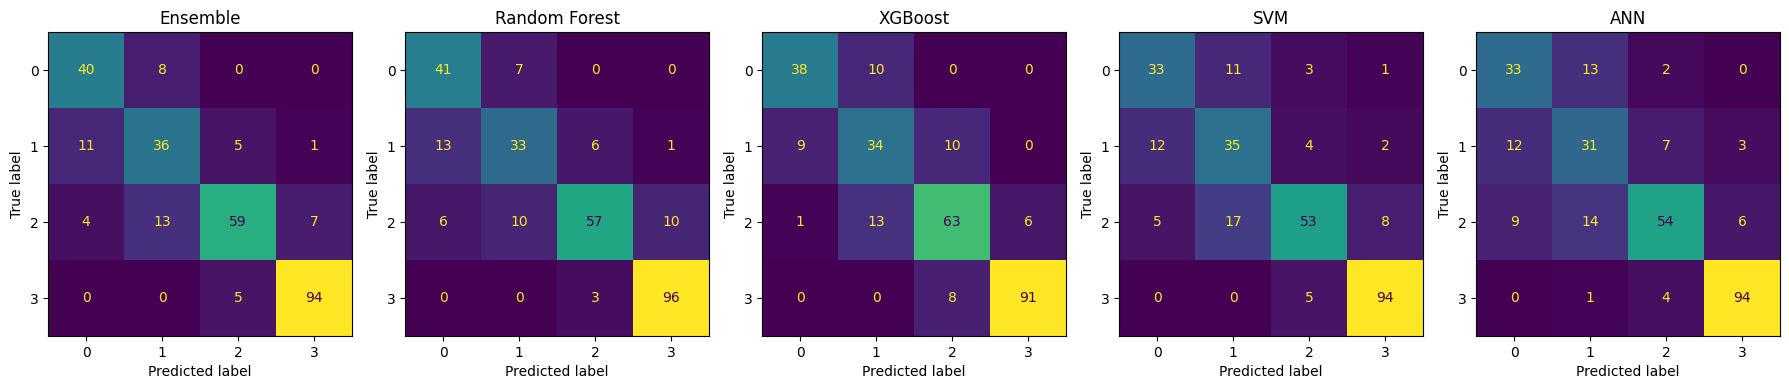

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels
y_true = y_test_idx

# Predictions for each model (argmax over probabilities)
y_pred_ens = P.argmax(axis=1)
y_pred_rf  = p_rf.argmax(axis=1)
y_pred_xgb = p_xgb.argmax(axis=1)
y_pred_svm = p_svm.argmax(axis=1)
y_pred_ann = p_ann.argmax(axis=1)

models = {
    "Ensemble": y_pred_ens,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm,
    "ANN": y_pred_ann
}

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(18, 4))

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()
